Chargement des ressources NLTK...

--- Exercice 1 ---
Phrase: The cat chased the mouse in the garden
Tags POS: [('The', 'DT'), ('cat', 'NN'), ('chased', 'VBD'), ('the', 'DT'), ('mouse', 'NN'), ('in', 'IN'), ('the', 'DT'), ('garden', 'NN')]
Affichage du graphe : Exercice 1: Hypernymes & Méronymes (Fermez la fenêtre pour continuer)


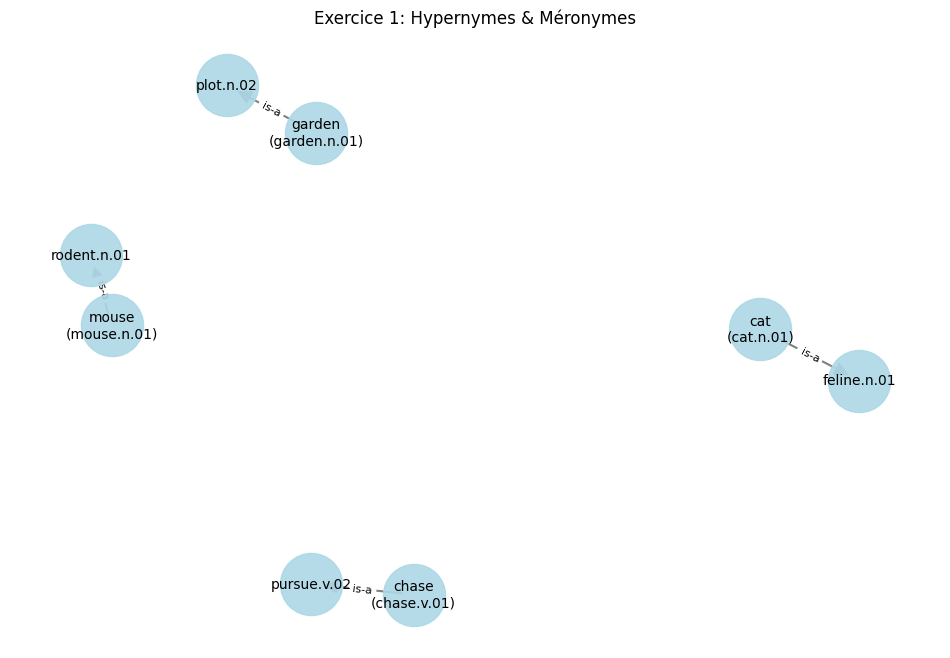


--- Exercice 2 ---
Affichage du graphe : Exercice 2: Rôles Sémantiques (Fermez la fenêtre pour continuer)


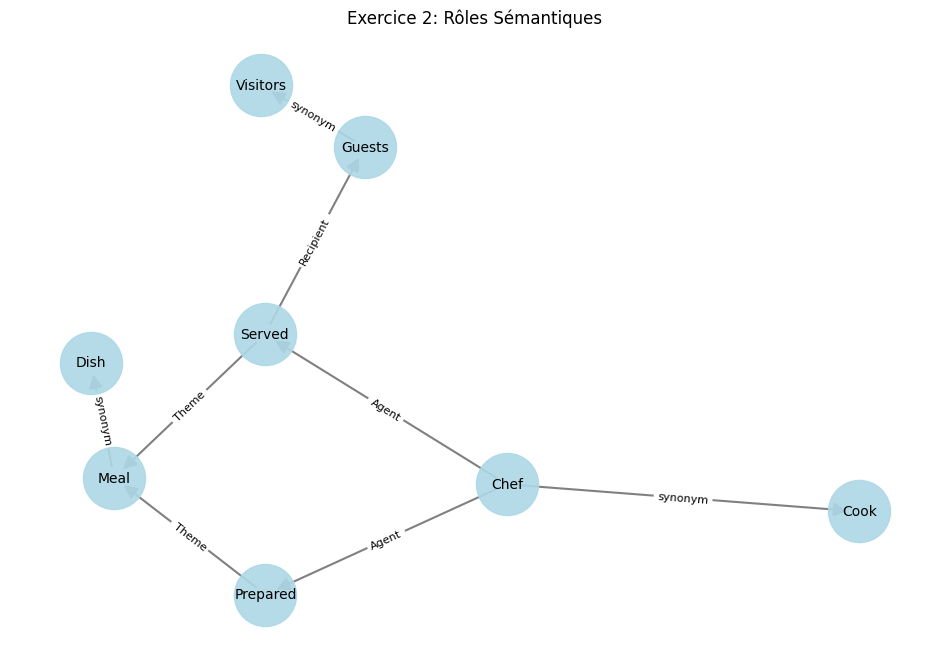


--- Exercice 3 ---
Affichage du graphe : Exercice 3: Alice & Laptop (Fermez la fenêtre pour continuer)


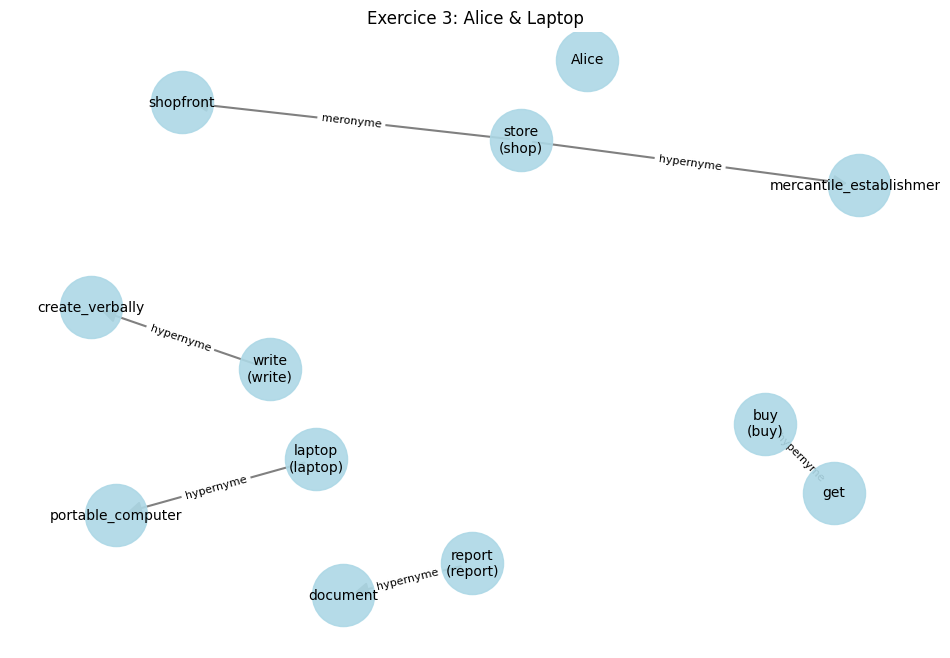


--- Exercice 4 ---
Affichage du graphe : Exercice 4


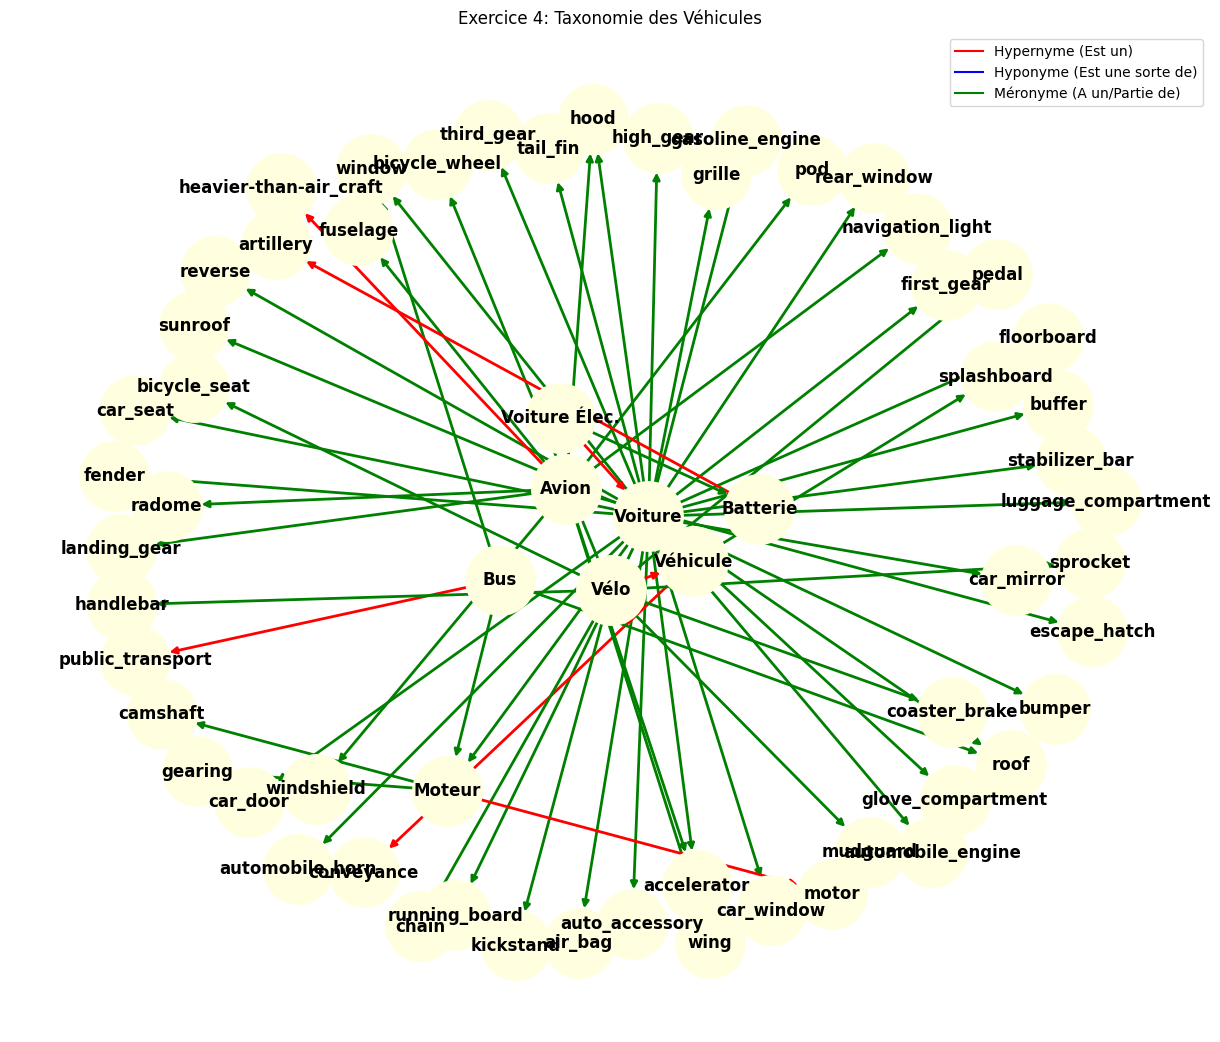

Tous les exercices sont terminés.


In [1]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

# --- 0. Configuration et Téléchargements NLTK ---
print("Chargement des ressources NLTK...")
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# Fonction utilitaire pour dessiner les graphes
def draw_graph(G, title, pos_type='spring', edge_colormap=None):
    plt.figure(figsize=(12, 8))
    
    if pos_type == 'shell':
        pos = nx.shell_layout(G)
    elif pos_type == 'kamada':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G, seed=42, k=0.5)  # k éloigne les nœuds

    # Couleurs des arêtes
    if edge_colormap:
        edge_colors = [edge_colormap.get(G[u][v].get('relation', ''), 'black') for u, v in G.edges()]
    else:
        edge_colors = 'gray'

    # Dessin
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    
    # Étiquettes des arêtes (si elles existent)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    if edge_labels and not edge_colormap: # On n'affiche pas le texte si on utilise un code couleur strict
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(title)
    plt.axis('off')
    print(f"Affichage du graphe : {title} (Fermez la fenêtre pour continuer)")
    plt.show()

# ==========================================
# EXERCICE 1 : The cat chased the mouse
# ==========================================
def exercice_1():
    print("\n--- Exercice 1 ---")
    sentence = "The cat chased the mouse in the garden"
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    
    print(f"Phrase: {sentence}")
    print(f"Tags POS: {tagged}")

    # Construction du graphe
    G = nx.DiGraph()
    
    # Mapping manuel vers les synsets corrects
    mapping = {
        "cat": wn.synset('cat.n.01'),
        "mouse": wn.synset('mouse.n.01'),
        "garden": wn.synset('garden.n.01'),
        "chase": wn.synset('chase.v.01')
    }

    for word, synset in mapping.items():
        label = f"{word}\n({synset.name()})"
        G.add_node(label)
        
        # Relation Hypernyme (Is-A)
        if synset.hypernyms():
            hyper = synset.hypernyms()[0] # On prend le 1er pour simplifier
            G.add_edge(label, hyper.name(), relation="is-a")
            
        # Relation Méronyme (Part-Of)
        # Note: 'cat' n'a pas de part_meronyms directs dans WordNet standard, 
        # mais on vérifie quand même pour la forme.
        for part in synset.part_meronyms():
            G.add_edge(label, part.name(), relation="part-of")

    draw_graph(G, "Exercice 1: Hypernymes & Méronymes")

# ==========================================
# EXERCICE 2 : The chef prepared a meal
# ==========================================
def exercice_2():
    print("\n--- Exercice 2 ---")
    # Phrase : The chef prepared a meal and served it to the guests.
    # Ici, on se concentre sur les rôles sémantiques qui ne sont pas natifs dans WordNet
    
    G = nx.DiGraph()
    
    # Nœuds principaux
    entities = ["Chef", "Meal", "Guests"]
    actions = ["Prepared", "Served"]
    
    # Ajout synonymes (Simulation)
    synonyms = {"Chef": ["Cook"], "Meal": ["Dish"], "Guests": ["Visitors"]}
    
    # Construction
    for ent in entities:
        G.add_node(ent, type='noun')
        # Liens synonymes
        if ent in synonyms:
            for syn in synonyms[ent]:
                G.add_edge(ent, syn, relation="synonym")
                
    for act in actions:
        G.add_node(act, type='verb')

    # Rôles sémantiques
    # Chef = Agent
    G.add_edge("Chef", "Prepared", relation="Agent")
    G.add_edge("Chef", "Served", relation="Agent")
    
    # Meal = Theme (Objet)
    G.add_edge("Prepared", "Meal", relation="Theme")
    G.add_edge("Served", "Meal", relation="Theme")
    
    # Guests = Recipient (Destinataire)
    G.add_edge("Served", "Guests", relation="Recipient")

    draw_graph(G, "Exercice 2: Rôles Sémantiques")

# ==========================================
# EXERCICE 3 : Alice bought a laptop
# ==========================================
def exercice_3():
    print("\n--- Exercice 3 ---")
    # Alice bought a laptop from the store. She used the laptop to write a report.
    
    G = nx.DiGraph()
    
    # Sélection des sens (WSD manuel)
    concepts = {
        "Alice": None, # Entité nommée, pas dans WordNet
        "laptop": wn.synset('laptop.n.01'),
        "store": wn.synset('shop.n.01'), # 'store' as shop
        "report": wn.synset('report.n.01'),
        "buy": wn.synset('buy.v.01'),
        "write": wn.synset('write.v.01')
    }
    
    for word, synset in concepts.items():
        if synset:
            node_label = f"{word}\n({synset.name().split('.')[0]})"
            G.add_node(node_label)
            
            # Ajout Hypernyme
            hyper = synset.hypernyms()[0].name().split('.')[0]
            G.add_edge(node_label, hyper, relation="hypernyme")
            
            # Ajout Méronyme (si dispo)
            if synset.part_meronyms():
                mero = synset.part_meronyms()[0].name().split('.')[0]
                G.add_edge(node_label, mero, relation="meronyme")
        else:
            G.add_node(word) # Pour Alice

    draw_graph(G, "Exercice 3: Alice & Laptop")

# ==========================================
# EXERCICE 4 : Véhicules (Couleurs spécifiques)
# ==========================================
def exercice_4():
    print("\n--- Exercice 4 ---")
    # Texte : Les voitures, les bus et les vélos sont tous des types de véhicules...
    
    G = nx.DiGraph()
    
    # Mapping Français -> WordNet Synset (Anglais)
    fr_to_wn = {
        "Voiture": wn.synset('car.n.01'),
        "Bus": wn.synset('bus.n.01'),
        "Vélo": wn.synset('bicycle.n.01'),
        "Véhicule": wn.synset('vehicle.n.01'),
        "Avion": wn.synset('airplane.n.01'),
        "Moteur": wn.synset('engine.n.01'),
        "Batterie": wn.synset('battery.n.01')
    }
    
    # Dictionnaire de couleurs pour l'affichage final
    # Rouge = Hypernyme, Bleu = Hyponyme, Vert = Méronyme
    color_map_rels = {
        "hyper": "red",
        "hypo": "blue",
        "mero": "green"
    }
    
    edge_colors_list = []

    for fr_word, synset in fr_to_wn.items():
        G.add_node(fr_word)
        
        # 1. Hypernymes (Rouge)
        for hyper in synset.hypernyms():
            hyper_name = hyper.name().split('.')[0]
            # On vérifie si l'hypernyme anglais correspond à un de nos mots français
            # (ex: car -> motor_vehicle -> vehicle). 
            # Pour simplifier l'exo, on pointe vers le concept "Véhicule" si c'est un véhicule
            if "vehicle" in hyper_name or hyper == wn.synset('vehicle.n.01'):
                G.add_edge(fr_word, "Véhicule", relation="hyper")
            else:
                # Sinon on affiche le terme anglais pour montrer la hiérarchie
                G.add_edge(fr_word, hyper_name, relation="hyper")
                
        # 2. Méronymes (Vert) - "Partie de"
        # WordNet est parfois incomplet, on force les relations du texte si nécessaire
        for part in synset.part_meronyms():
            part_name = part.name().split('.')[0]
            G.add_edge(fr_word, part_name, relation="mero")

    # Ajout manuel des relations explicites du texte pour respecter la consigne
    # "Les voitures et bus ont des moteurs" (Moteur fait partie de Voiture)
    G.add_edge("Voiture", "Moteur", relation="mero")
    G.add_edge("Bus", "Moteur", relation="mero")
    
    # "Voitures électriques utilisent des batteries"
    G.add_node("Voiture Élec.")
    G.add_edge("Voiture Élec.", "Batterie", relation="mero")
    G.add_edge("Voiture Élec.", "Voiture", relation="hyper") # C'est un type de voiture

    # "Vélos n'ont pas de moteur" (Pas d'arête)
    
    # Configuration visuelle spécifique pour l'exercice 4
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=10, k=0.8)
    
    # Récupération des couleurs
    edges = G.edges(data=True)
    colors = [color_map_rels.get(data['relation'], 'gray') for u, v, data in edges]
    
    nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=2500, edge_color=colors, width=2, font_weight='bold')
    
    # Légende manuelle
    plt.plot([],[], color='red', label='Hypernyme (Est un)')
    plt.plot([],[], color='blue', label='Hyponyme (Est une sorte de)')
    plt.plot([],[], color='green', label='Méronyme (A un/Partie de)')
    plt.legend()
    
    plt.title("Exercice 4: Taxonomie des Véhicules")
    print("Affichage du graphe : Exercice 4")
    plt.show()

# ==========================================
# MAIN EXECUTION
# ==========================================
if __name__ == "__main__":
    exercice_1()
    exercice_2()
    exercice_3()
    exercice_4()
    print("Tous les exercices sont terminés.")